In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

sns.set_palette('deep')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,Unnamed: 0,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG
0,0,40369,309,2016-12-19,29.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,40370,309,2016-12-19,64.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,40372,309,2016-12-19,32.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,40373,309,2016-12-19,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,46272,309,2016-12-19,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35339,35537,40370,1380,2019-12-30,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0
35340,35538,40372,1380,2019-12-30,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0
35341,35539,40373,1380,2019-12-30,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0
35342,35540,46272,1380,2019-12-30,NaN,1.0,0.0,284.29,199.0,0.0,1.0


In [3]:
df_train.isna().sum()

Unnamed: 0              0
product_rk              0
store_location_rk       0
period_start_dt         0
demand               1200
PROMO1_FLAG           185
PROMO2_FLAG           185
PRICE_REGULAR        1127
PRICE_AFTER_DISC     1132
NUM_CONSULTANT        185
AUTORIZATION_FLAG     185
dtype: int64

In [4]:
df_train.dtypes

Unnamed: 0             int64
product_rk             int64
store_location_rk      int64
period_start_dt       object
demand               float64
PROMO1_FLAG          float64
PROMO2_FLAG          float64
PRICE_REGULAR        float64
PRICE_AFTER_DISC     float64
NUM_CONSULTANT       float64
AUTORIZATION_FLAG    float64
dtype: object

In [5]:
df_train.period_start_dt = df_train.period_start_dt.apply(pd.to_datetime)

In [6]:
df_train['month'] = df_train.period_start_dt.apply(lambda x: x.month)
df_train['day_of_year'] = df_train.period_start_dt.apply(lambda x: x.dayofyear)

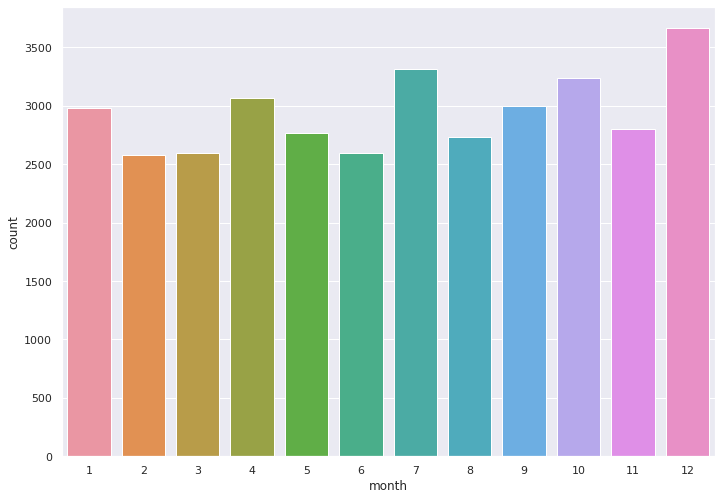

In [7]:
plot = sns.countplot(data=df_train, x='month')

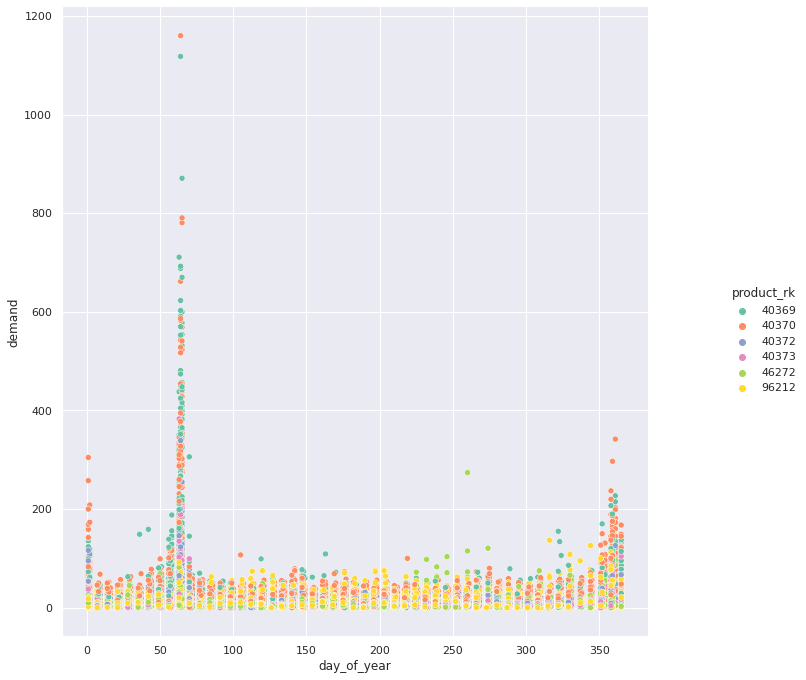

In [8]:
g = sns.relplot(data=df_train, x='day_of_year', y='demand', hue='product_rk', palette=sns.color_palette("Set2")[:6])
g.fig.set_figwidth(12)
g.fig.set_figheight(10)

In [9]:
df_train.nunique()

Unnamed: 0           35344
product_rk               6
store_location_rk       41
period_start_dt        159
demand                1806
PROMO1_FLAG              3
PROMO2_FLAG              1
PRICE_REGULAR          229
PRICE_AFTER_DISC      1036
NUM_CONSULTANT           1
AUTORIZATION_FLAG        2
month                   12
day_of_year            159
dtype: int64

In [10]:
df_test = df_train[df_train.demand.isna()].copy()
df_train = df_train[df_train.demand.notna()].copy()
df_test

,Unnamed: 0,product_rk,store_location_rk,period_start_dt,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,month,day_of_year
908,908,40369,317,2019-12-02,NaN,0.0,0.0,500.00,500.0,0.0,1.0,12,336
909,909,40370,317,2019-12-02,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0,12,336
910,910,40372,317,2019-12-02,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0,12,336
911,911,40373,317,2019-12-02,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0,12,336
912,912,46272,317,2019-12-02,NaN,1.0,0.0,284.29,199.0,0.0,1.0,12,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35339,35537,40370,1380,2019-12-30,NaN,0.0,0.0,1000.00,1000.0,0.0,1.0,12,364
35340,35538,40372,1380,2019-12-30,NaN,0.0,0.0,2000.00,2000.0,0.0,1.0,12,364
35341,35539,40373,1380,2019-12-30,NaN,0.0,0.0,3000.00,3000.0,0.0,1.0,12,364
35342,35540,46272,1380,2019-12-30,NaN,1.0,0.0,284.29,199.0,0.0,1.0,12,364


In [11]:
print('Unique vals:', end='\n\n')
print(df_test.nunique(), end='\n\n')
print('Nans:', end='\n\n')
print(df_test.isna().sum())

Unique vals:

Unnamed: 0           1200
product_rk              6
store_location_rk      40
period_start_dt         5
demand                  0
PROMO1_FLAG             2
PROMO2_FLAG             1
PRICE_REGULAR          18
PRICE_AFTER_DISC       35
NUM_CONSULTANT          1
AUTORIZATION_FLAG       2
month                   1
day_of_year             5
dtype: int64

Nans:

Unnamed: 0              0
product_rk              0
store_location_rk       0
period_start_dt         0
demand               1200
PROMO1_FLAG             0
PROMO2_FLAG             0
PRICE_REGULAR         120
PRICE_AFTER_DISC      120
NUM_CONSULTANT          0
AUTORIZATION_FLAG       0
month                   0
day_of_year             0
dtype: int64


In [12]:
df_train.isna().sum()

Unnamed: 0              0
product_rk              0
store_location_rk       0
period_start_dt         0
demand                  0
PROMO1_FLAG           185
PROMO2_FLAG           185
PRICE_REGULAR        1007
PRICE_AFTER_DISC     1012
NUM_CONSULTANT        185
AUTORIZATION_FLAG     185
month                   0
day_of_year             0
dtype: int64

In [13]:
def get_processed(df):
    df.dropna(subset=['NUM_CONSULTANT', 'AUTORIZATION_FLAG'], inplace=True)
    df.fillna(-1, inplace=True)

get_processed(df_train)

df_train.isna().sum()

Unnamed: 0           0
product_rk           0
store_location_rk    0
period_start_dt      0
demand               0
PROMO1_FLAG          0
PROMO2_FLAG          0
PRICE_REGULAR        0
PRICE_AFTER_DISC     0
NUM_CONSULTANT       0
AUTORIZATION_FLAG    0
month                0
day_of_year          0
dtype: int64

In [14]:
df_test.fillna(-1, inplace=True)

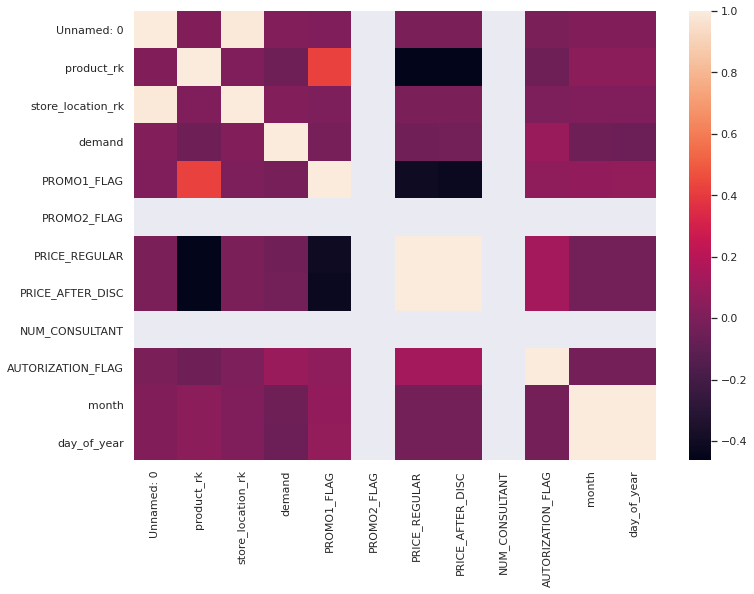

In [15]:
plot = sns.heatmap(df_train.drop(columns=['period_start_dt']).corr())

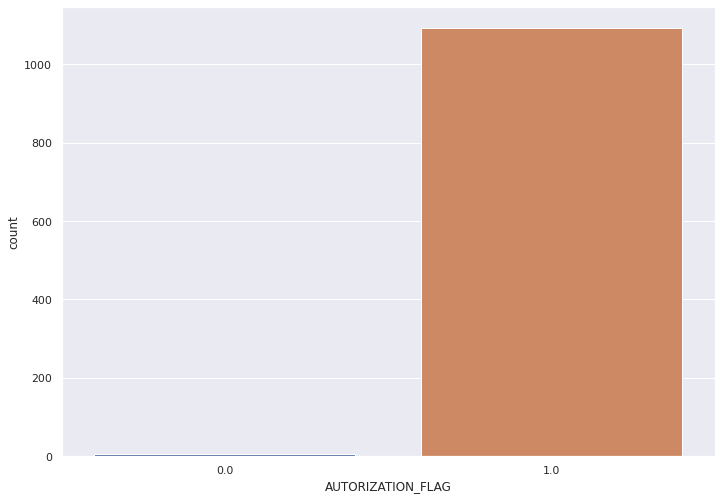

In [16]:
plot = sns.countplot(data=df_train[df_train['demand'] > 50], x='AUTORIZATION_FLAG')

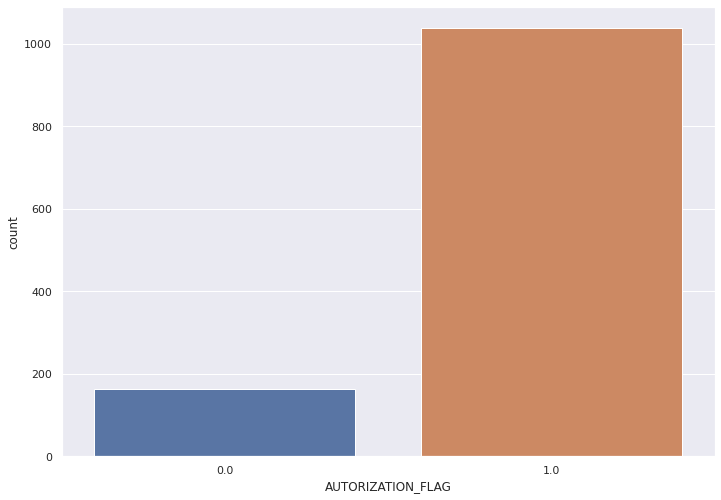

In [17]:
plot = sns.countplot(data=df_test, x='AUTORIZATION_FLAG')

Как видим из графиков, почти все значения у которых высокий спрос имеют флаг 'AUTORIZATION_FLAG' равный 1, и если посмотреть на test то можно заметить, что доля таких значений очень велика. Конечно же специально переобучаться на эти данные будет плохой идеей, поэтому просто выделим отдельный набор (X_test_special) чтобы дополнительно проверить нашу модель после обучения.

In [18]:
del df_train['period_start_dt']
del df_test['period_start_dt']

y = df_train.demand
X = df_train.drop(columns=['demand'])
X.drop(columns=['Unnamed: 0'], inplace=True)

Посмотрим на финальный набор:

In [19]:
X

,product_rk,store_location_rk,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,month,day_of_year
20,40369,317,1.0,0.0,500.000000,500.000000,0.0,1.0,12,361
21,40370,317,1.0,0.0,1000.000000,1000.000000,0.0,1.0,12,361
22,40372,317,1.0,0.0,2000.000000,2000.000000,0.0,1.0,12,361
23,40373,317,1.0,0.0,3000.000000,3000.000000,0.0,1.0,12,361
24,46272,317,1.0,0.0,157.000000,157.000000,0.0,1.0,12,361
...,...,...,...,...,...,...,...,...,...,...
35309,40370,1380,0.0,0.0,1000.000000,1000.000000,0.0,1.0,11,329
35310,40372,1380,0.0,0.0,2000.000000,2000.000000,0.0,1.0,11,329
35311,40373,1380,0.0,0.0,3000.000000,3000.000000,0.0,1.0,11,329
35312,46272,1380,1.0,0.0,284.290000,199.000000,0.0,1.0,11,329


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [21]:
X_test_special = X_test[X_test['AUTORIZATION_FLAG'] == 1]
y_test_special = y_test[X_test['AUTORIZATION_FLAG'] == 1]

In [22]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [23]:
mape_scorer = make_scorer(
    smape,
    greater_is_better=False
)

parameters = {'n_estimators':[1, 2, 5, 10, 20, 50, 100],'max_depth' : [x for x in range(1, 21)]}
model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(model, parameters, scoring=mape_scorer)
grid.fit(X_train, y_train)
grid.cv_results_

{'mean_fit_time': array([0.00609527, 0.01056895, 0.01743965, 0.03241835, 0.06044679,
        0.15025845, 0.28838029, 0.0073627 , 0.01188049, 0.02543674,
        0.04960923, 0.09323001, 0.22674398, 0.44414501, 0.00854678,
        0.01457386, 0.03267164, 0.06273847, 0.12313662, 0.30421109,
        0.606741  , 0.01003346, 0.01754885, 0.04020085, 0.07783718,
        0.15421848, 0.38046837, 0.7667871 , 0.01136479, 0.02093205,
        0.04843216, 0.09625216, 0.19033337, 0.46059823, 0.92935114,
        0.01305408, 0.02359004, 0.05540981, 0.10888205, 0.21867695,
        0.54462638, 1.05960512, 0.0139976 , 0.02582846, 0.06134801,
        0.12090273, 0.24123054, 0.60018644, 1.19347653, 0.01539063,
        0.02863011, 0.06828356, 0.1342063 , 0.26616497, 0.6625001 ,
        1.32353969, 0.01658211, 0.03113408, 0.07449803, 0.14643817,
        0.29089341, 0.72439103, 1.44767542, 0.01767912, 0.0336216 ,
        0.08052673, 0.15896316, 0.31445422, 0.79865866, 1.66600585,
        0.01949487, 0.03648272,

In [24]:
grid.best_params_

{'max_depth': 17, 'n_estimators': 10}

In [25]:
model = RandomForestRegressor(**grid.best_params_, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_spec_pred = model.predict(X_test_special)
print('Usual test:', smape(y_test, y_pred))
print('Special test:', smape(y_test_special, y_spec_pred))

Usual test: 60.33428944301525
Special test: 63.547693052028514


Как видим модель достаточно не плохо обучилась и при этом переобучения на элементы с высоким спросом не произошло

In [26]:
df_test.drop(columns=['demand', 'Unnamed: 0'], inplace=True)
df_test

,product_rk,store_location_rk,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,month,day_of_year
908,40369,317,0.0,0.0,500.00,500.0,0.0,1.0,12,336
909,40370,317,0.0,0.0,1000.00,1000.0,0.0,1.0,12,336
910,40372,317,0.0,0.0,2000.00,2000.0,0.0,1.0,12,336
911,40373,317,0.0,0.0,3000.00,3000.0,0.0,1.0,12,336
912,46272,317,1.0,0.0,284.29,199.0,0.0,1.0,12,336
...,...,...,...,...,...,...,...,...,...,...
35339,40370,1380,0.0,0.0,1000.00,1000.0,0.0,1.0,12,364
35340,40372,1380,0.0,0.0,2000.00,2000.0,0.0,1.0,12,364
35341,40373,1380,0.0,0.0,3000.00,3000.0,0.0,1.0,12,364
35342,46272,1380,1.0,0.0,284.29,199.0,0.0,1.0,12,364


In [27]:
model = RandomForestRegressor(**grid.best_params_, random_state=0)
model.fit(X, y)
preds = model.predict(df_test)

In [28]:
preds

array([ 7.00109962, 12.41209707,  4.74035312, ..., 36.0207652 ,
       12.0959017 , 36.4433334 ])

In [29]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub

,id,predicted
0,908,0
1,909,0
2,910,0
3,911,0
4,912,0
...,...,...
1195,35537,0
1196,35538,0
1197,35539,0
1198,35540,0


In [30]:
sample_sub['predicted'] = preds

In [31]:
sample_sub.to_csv('sol_RF_final_v.csv', index=0)
sample_sub

,id,predicted
0,908,7.001100
1,909,12.412097
2,910,4.740353
3,911,4.219754
4,912,2.689296
...,...,...
1195,35537,89.815300
1196,35538,43.410458
1197,35539,36.020765
1198,35540,12.095902
